In [68]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

In [7]:
with open('MT-direction-tuning.pkl', 'rb') as f:
    data = pickle.load(f, encoding='latin1')
    trial_directions = data['direction'].flatten()
    spike_times = np.asarray([trial.flatten() for trial in data['spikeTimes'].flatten()])

# Neuron Responses - Tuning Curves

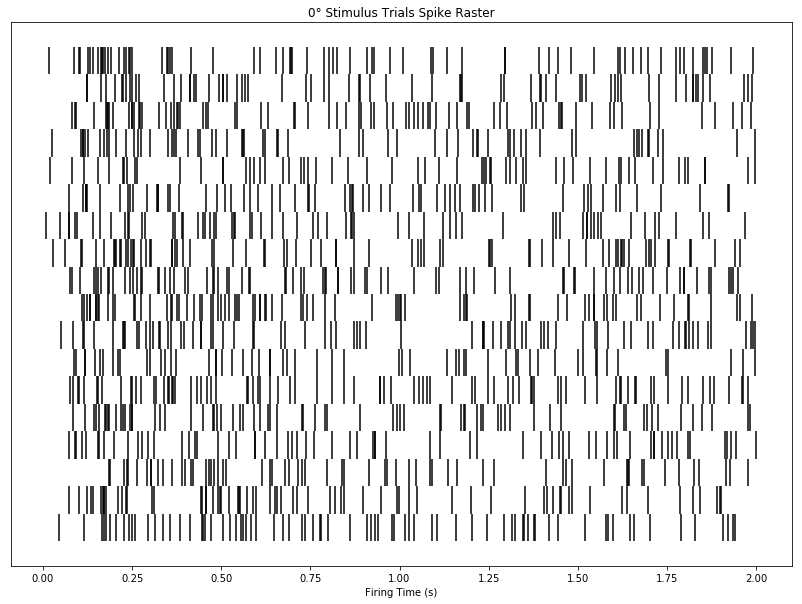

In [67]:
zero_trials = [spikes for degree, spikes in zip(trial_directions, spike_times) if degree == 0]

plt.figure(figsize=(14,10))
plt.xlabel('Firing Time (s)')
ax = plt.gca()
ax.set_yticklabels([])
ax.set_yticks([])
plt.title( u'0\N{DEGREE SIGN} Stimulus Trials Spike Raster')

for i, spikes in enumerate(zero_trials):
    plt.vlines(spikes, i + .5, i + 1.5)

plt.show()

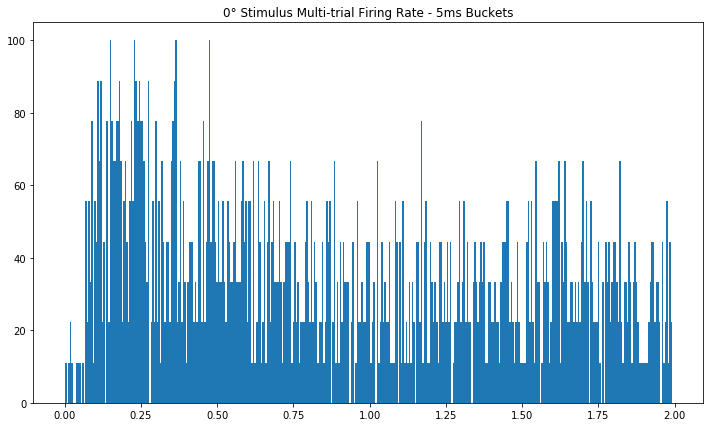

In [59]:
bin_width = 0.005 # 5ms
multi_trial_totals, _ = np.histogram(np.concatenate(zero_trials), np.arange(0,2,bin_width))
multi_trial_means = (1 / bin_width) * multi_trial_totals / len(zero_trials) # converts to frequency

plt.figure(figsize=(12,7))
plt.title(u'0\N{DEGREE SIGN} Stimulus Multi-trial Firing Rate - 5ms Buckets')
plt.bar(np.arange(0,1.995,bin_width), multi_trial_means, bin_width)
plt.show()

In [9]:
trial9 = spike_times[8] # I assume trial 9 refers to the 9th rather than index 9

In [24]:
def gaussian(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-np.power((x - mu) / sigma, 2) / 2)

In [44]:
values_5 = np.zeros(int(2 / .001))
values_50 = np.zeros(int(2 / .001))

for spike_time in trial9:
    values_5 += gaussian(np.arange(0, 2, 0.001), spike_time, 0.005)
    values_50 += gaussian(np.arange(0, 2, 0.001), spike_time, 0.05)

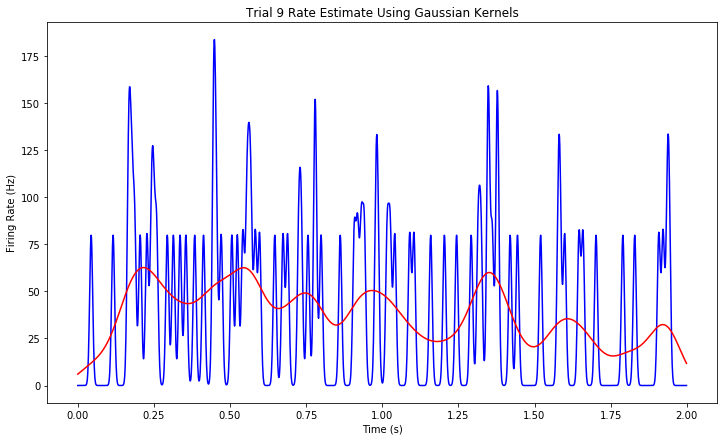

In [115]:
plt.figure(figsize=(12,7))
plt.title('Trial 9 Rate Estimate Using Gaussian Kernels')
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (Hz)')
plt.plot(np.arange(0, 2, 0.001), values_5, 'blue')
plt.plot(np.arange(0, 2, 0.001), values_50, 'red')
plt.show()

The blue is using $\sigma = 5ms$ and the red is $\sigma = 50ms$.

In [95]:
directions = np.sort(np.unique(trial_directions))

In [167]:
means = np.zeros(len(directions))
std_errs = np.zeros(len(directions))

for i, d in enumerate(directions):
    trials = spike_times[trial_directions == d]
    slices = np.asarray([t[(t >= 0.05) & (t <= 0.25)] for t in trials])
    n = len(trials)
    rates = [len(t) * 5 for t in slices]
    means[i] = np.mean([len(t) * 5 for t in slices])

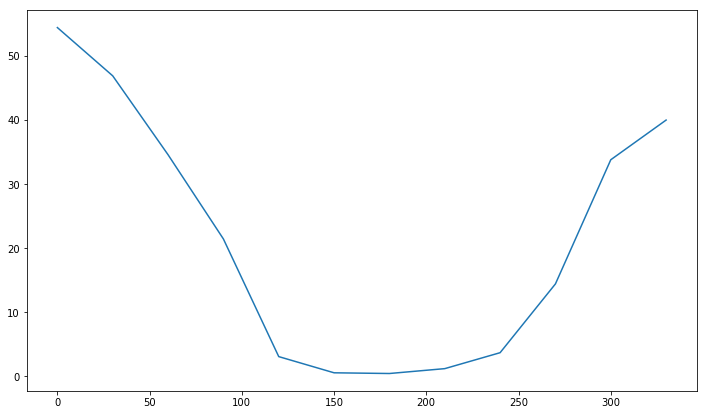

In [168]:
plt.figure(figsize=(12,7))
plt.plot(directions, means)
plt.show()